In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [48]:
img_bin = cv.imread('../scripts/test.png', 0)

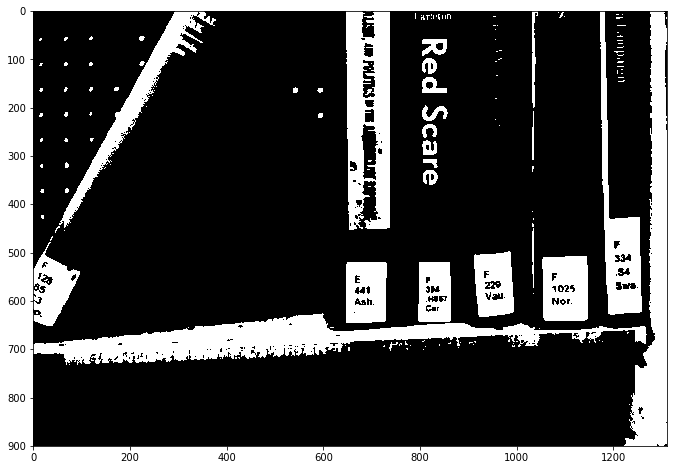

In [49]:
plt.figure(figsize=(12,8))
plt.imshow(img_bin, cmap='gray')
plt.show()

In [50]:
M, N = img_bin.shape
row_sum = np.sum(img_bin, axis=1) / 255
col_sum = np.sum(img_bin, axis=0) / 255

In [51]:
def movingAverage(values, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(values, window, 'same')

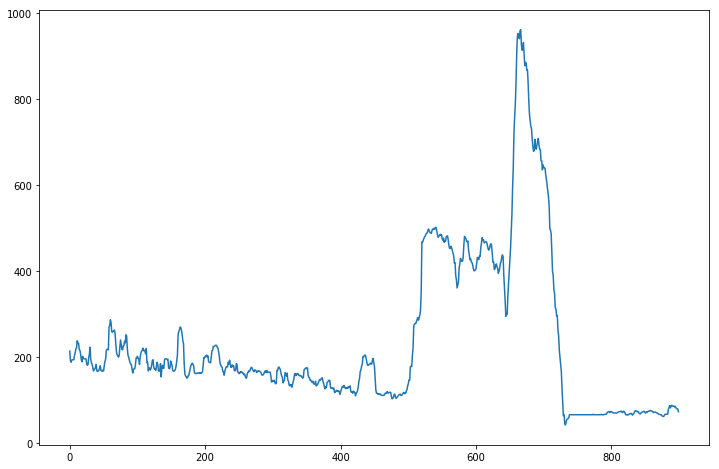

In [52]:
plt.figure(figsize=(12,8))
plt.plot(list(range(M)), row_sum)
plt.show()

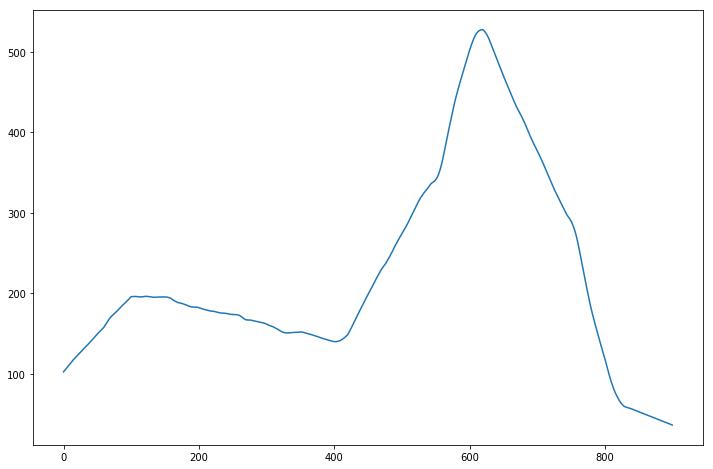

In [53]:
row_moving_average = movingAverage(row_sum, 200)
plt.figure(figsize=(12,8))
plt.plot(list(range(M)), row_moving_average)
plt.show()

In [54]:
gradient = np.gradient(row_moving_average)

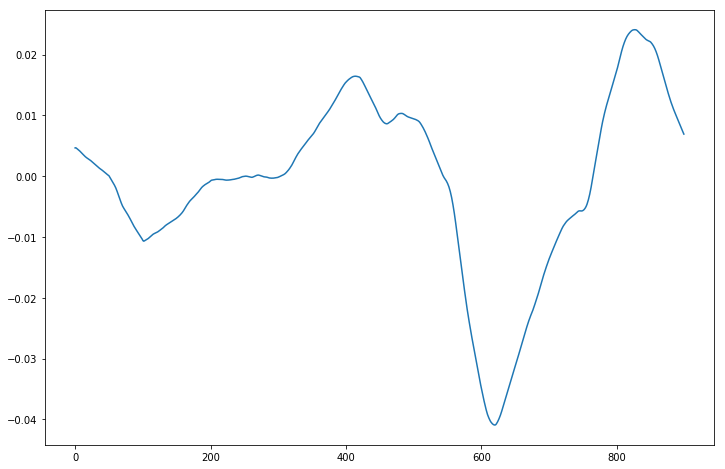

In [55]:
plt.figure(figsize=(12,8))
plt.plot(list(range(M)), movingAverage(np.gradient(movingAverage(gradient, 100)), 100))
plt.show()

In [56]:
from scipy.signal import find_peaks, peak_widths

In [61]:
peaks, _ = find_peaks(row_moving_average, height=250)
#results_half = peak_widths(row_moving_average, peaks, rel_height=0.5)
widths, heights, left, right = peak_widths(row_moving_average, peaks, rel_height=0.8)

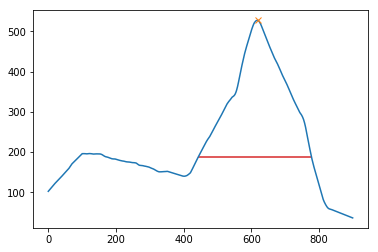

In [62]:
plt.plot(row_moving_average)
plt.plot(peaks, row_moving_average[peaks], "x")
# plt.hlines(*results_half[1:], color="C2")
plt.hlines(heights, left, right, color="C3")
plt.show()

In [44]:
left.astype('int')

array([2686, 3864])

In [45]:
bounds = list(zip(left.astype('int'), right.astype('int')))

In [46]:
bounds

[(2686, 3325), (3864, 4154)]

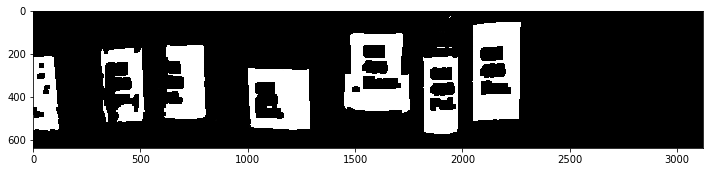

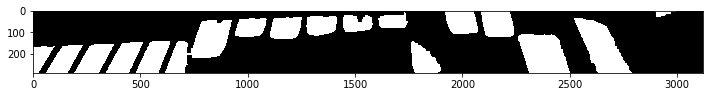

In [47]:
for (l, r) in bounds:
    plt.figure(figsize=(12,8))
    plt.imshow(img_bin[l:r,:], cmap='gray')
    plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img_bin, cmap='gray')
plt.show()